In [1]:
# importing the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the input file
data = pd.read_csv('headbrain.csv')

In [3]:
print(data.shape)

(237, 4)


In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
# checking for any null values
data.isnull().any()

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

this dataset is clean and luckily no null values

In [7]:
# checking for distinct values
data.nunique()

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64

# Pairplots to find any important feature

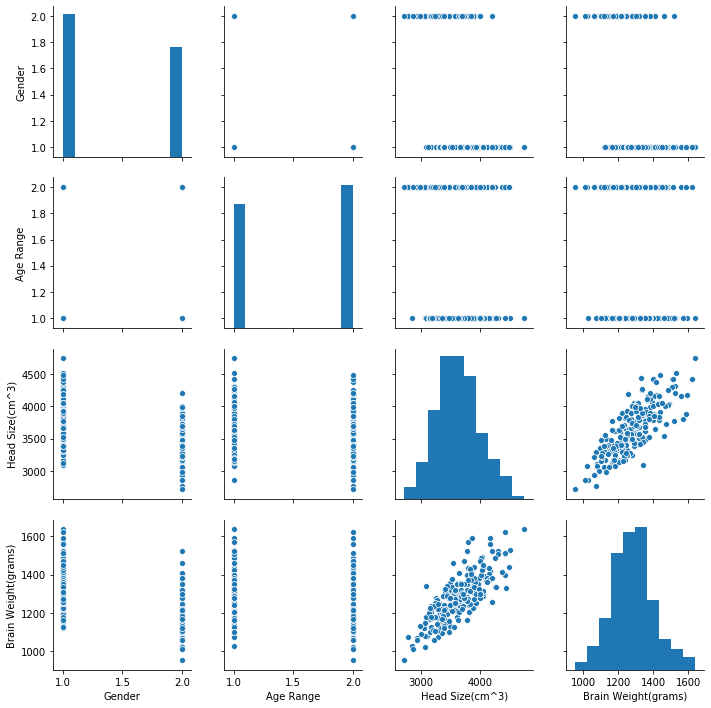

In [8]:
sns.pairplot(data)

Making it more visually appealing for understanding the diagrams better

C:\Users\91917\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\91917\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


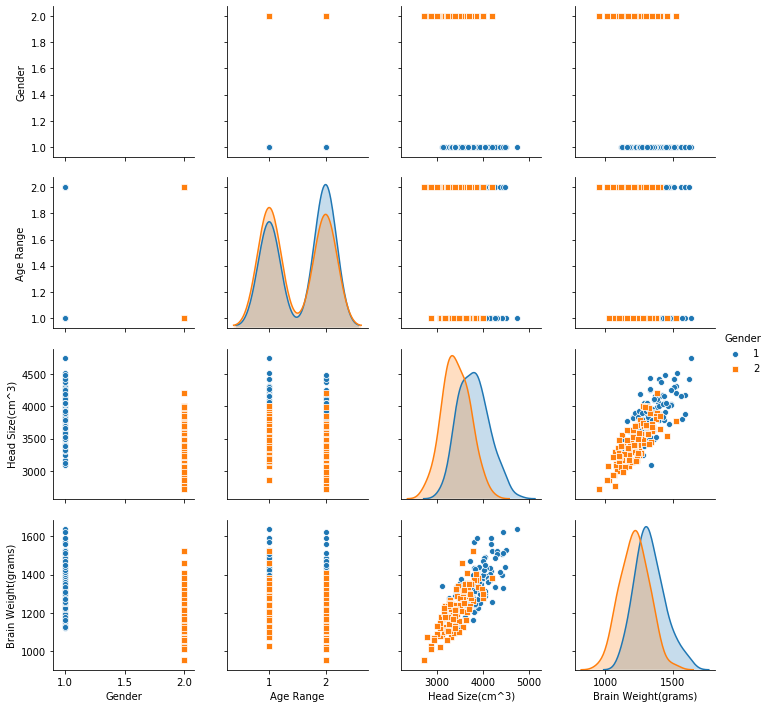

In [9]:
sns.pairplot(data, hue="Gender", markers=["o", "s"])

My Observtions:
After thorough analysis, I can find two features very interesting [Head size,Brain Weight]

In [10]:
# collecting our x and y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s). It can be used to check if there exists any correlation between the variables.

Simple Linear Regression -> relationship between just two variables (a dependent Vs an independent)
Multiple Regression -> relationship between two or more variables ( a dependent Vs 2 or more independent)
The current data set in an example of Simple Linear Regression

We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

The formula goes like this -
y = mx+c [ In some place it is also like this: y = b0 + b1x ]

Where ,
c - is the y-intercept

m - is the slope / coefficient -> this quantity effects the values of y

In our example -
BrainWeight = m * HeadSize + constant
constant = BrainWeight - (m * HeadSize)

In [11]:
#def Linear_Regression(X,Y):
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate (m or b1) & (c or b0)
numerator= 0
denominator=0
for i in range(n):
    numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
    denominator += ((X[i] - mean_x) ** 2)
m = numerator/ denominator
c = mean_y - m * mean_x

#printing the coefficients
print('slope =',m,'y-intercept =',c)

slope = 0.26342933948939945 y-intercept = 325.57342104944223


this means that:
    Brainweight = (0.26342933948939945)*Headsize + (325.57342104944223)
    
    let's represent this thing in the following

In [12]:
y_hat = m*X +c

# Plotting the Linear Regression

Let's draw the scatter plot of the data points Brain weight(y axis) and head size(x axis)

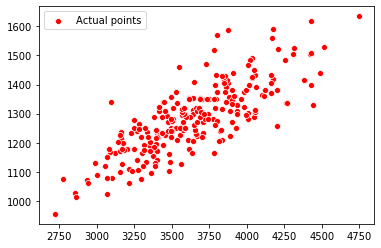

In [13]:
sns.scatterplot(X,Y, color = 'r', label = "Actual points")

Let's draw the regression line that we found out

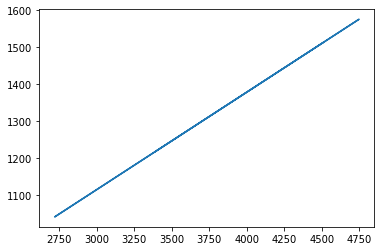

In [14]:
plt.plot(X, y_hat, label= "Regression Line")

Giving labels to the graph

Text(0, 0.5, 'Brain weight')

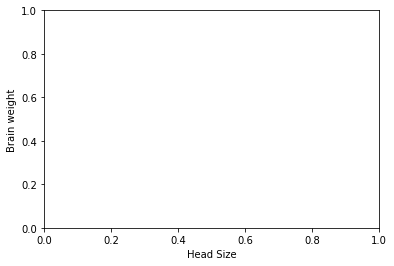

In [15]:
plt.xlabel('Head Size')
plt.ylabel('Brain weight')

Combining all this together :)

Text(0, 0.5, 'Brain weight')

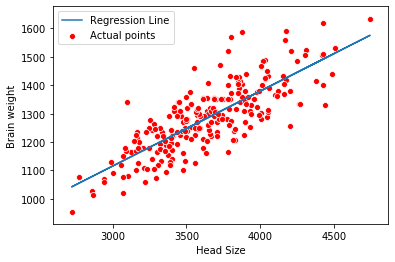

In [16]:
plt.plot(X, y_hat, label= "Regression Line")
sns.scatterplot(X,Y, color = 'r', label = "Actual points")
plt.xlabel('Head Size')
plt.ylabel('Brain weight')

Now let's do the prediction. So whenever we get a data point "Head Size", let's predict what can be the possible Brain weight

In [17]:
#predicting the value of y for given value of x
y_predicted = []
for i in range(len(X)):
    y_predicted.append(m*X[i] + c)

using R Squared Method to check if this model is good or not, generally the lower the value of this the better is the model

#ss_res = sum of squares -> sum((y_observed - y_predicted)**2)

ss_tot = total sum of squares -> sum((y_observed-y_predicted)*2)

In [18]:
ss_res = 0
ss_tot = 0
for i in range(len(X)):
    ss_res += (y_predicted[i]-Y[i])**2
    ss_tot += (Y[i]-mean_y)**2
rms_method_score = 1 - ss_res/ ss_tot
print(rs_method)

0.6393117199570003


#let's use the sklearn which is an built library and see what the rs_method score is achieved by that

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#The reason to reshape is to covert it into a 2D array. More can be found on the following video link
# https://www.youtube.com/watch?v=3wi0lJPfLUY
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

#split and testing/training on 80-20% 
#this is on partil data
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size = 0.8, random_state = 42)

clf = LinearRegression()
clf.fit(X_train,Y_train)
prediction = clf.predict(X_valid)

rms_method_score2 = clf.score(X_train, Y_train)
print(rms_method_score2)

0.6157541904869992


In [26]:
#on full data
clf1 = LinearRegression()
clf.fit(X,Y)
prediction = clf.predict(X_valid)

rms_method_score3 = clf.score(X,Y)
print(rms_method_score3)

0.639311719957
